# Logistic Regression from scratch:
---

A simple implementation of Logistic Regression using numpy.<br>
Tested the model on the Iris dataset.

# 1. Imports and Loading Data:
---

In [19]:
from sklearn.datasets import load_iris   # just for loading data
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,4)

In [3]:
data = load_iris()
classes = data['target_names']
data_ = np.c_[data['data'], data['target']]

# 2. Class Definition:
---

In [25]:
class LogisticRegression(object):
    """Class for Logistic Regression."""
    
    def __init__(self):
        """ theta  -- Parameters (initialised in fit method)
            losses -- list of losses to add during training. 
        """
        self.theta = None
        self.losses = []
    
    def sigmoid(self, z):
        """Activation function"""
        return 1/(1 + np.exp(-z))
        
    def predict(self, X):
        """Return predictions based on current parameters."""
        return self.sigmoid(X.dot(self.theta))

    def loss(self, X, y):
        """Return log loss function value to optimise."""
        return (-y * np.log(self.predict(X)) - (1 - y) * np.log(1 - self.predict(X))).mean()

    def gradient(self, X, y):
        """Return the gradient of the loss function."""
        return (1/(2 * X.shape[0])) * X.T.dot(self.predict(X) - y)

    def fit(self, X_train, y_train, lr=0.01, num_iter=5000, epochs=1):
        """Fit a Logistic Regression model on the given data.
           X_train  -- train data (m * n matrix)
           y_train  -- labels (m-dim vector of 1s/0s)
           lr       -- learning rate (default 0.01)
           num_iter -- number of iterations to run (default 5000)
           epochs   -- number of times to iterate over data (default 1)
           Return: None
        """
        self.theta = np.zeros(X.shape[1] + 1)
        for epoch in range(epochs):
            for _ in range(num_iter):
                op = self.predict(X_train)
                self.theta -= lr * self.gradient(X_train, y_train)
                self.losses.append(self.loss(X_train, y_train))

# 3. One vs. All Classification:
---

In [26]:
def one_v_all_class(X, y, classes, plot=False):
    """ Fit n LogisticRegression models for N classes.
        X       -- train data (m*n matrix)
        y       -- labels (m dimensional vector of [0, N))
        classes -- list of class names
        plot    -- boolean to show plot (default False)
        Return: N LogisticRegression Objects
    """
    models = {}
    
    for cl in range(len(classes)):
        y_tr = (y_train == cl).astype(np.int32)
        model = LogisticRegression()
        model.fit(np.c_[np.ones(X_train.shape[0]), X_train], y_tr, lr=0.15)
        models[classes[cl]] = model
    
        if plot:
            plt.subplot(1, 3, cl+1)
            plt.plot(model.losses)
            plt.grid()
            plt.title('Loss v. Iterations Graph: ' + str(classes[cl]))
            plt.ylabel('Log Loss: ')
            plt.xlabel('Iterations: ')
    
    if plot:
        plt.tight_layout()
        plt.show() 
    
    return models

def one_v_all_predict(X, models):
    """Return One Vs. All Classification predictions for N classes.
       X      -- train_data (m*n matrix)
       models -- list of models on each class of length N
       Return: m dimensional vector of [0, N)
    """
    mods = models.items()
    preds = [mod.predict(np.c_[np.ones(X.shape[0]), X]) for name, mod in mods]
    return np.array(preds).argmax(axis=0)

def accuracy_score(y_true, y_pred):
    """Returns accuracy given true and predicted labels.
       y_true -- true labels - m dimensional vector of [0, N)
       y_pred -- predicted labels - m dimensional vector of [0, N)
       Return: float
    """
    return ((y_true == y_pred).sum()/y_pred.shape[0])

# 4. Data split and testing the model:
---

In [38]:
# simple random 80-20 split:
np.random.shuffle(data_)

X = data_[:, :-1]
y = data_[:, -1]

X_train = X[:int(0.8*X.shape[0]), :]
y_train = y[:int(0.8*X.shape[0])]

X_val = X[int(0.8*X.shape[0]):, :]
y_val = y[int(0.8*X.shape[0]):]

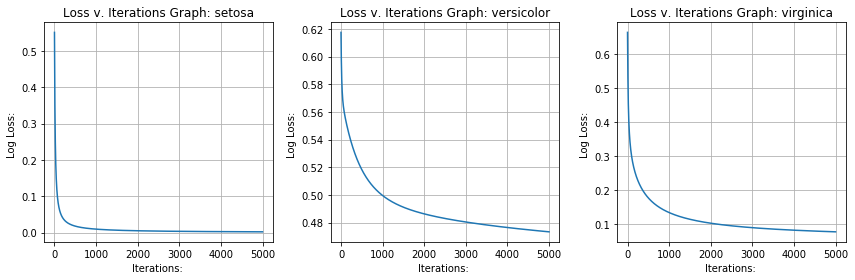

Train Accuracy: 97.5
Validation Accuracy: 97.5


In [39]:
models = one_v_all_class(X_train, y_train, classes, plot=True)

print("Train Accuracy: " + str(accuracy_score(y_train, one_v_all_predict(X_train, models)) * 100))
print("Validation Accuracy: " + str(accuracy_score(y_val, one_v_all_predict(X_val, models)) * 100))